# Introduction

In this project, we will analyze and classify a wine color dataset. The dataset contains various wine parameters, such as acidity, alcohol content and pH. Our goal is to test different classification algorithms on two versions of this dataset: a less processed and a more processed version.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

classifiers = []
names = []

# Data

### Database presentation

First, we will load the data from the CSV file and take a look at it.

In [3]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Preprocessing

W tej części będziemy sprawdzać, czy w naszym zbiorze danych występują braki danych oraz błędy. Jeśli tak, naprawimy je w odpowiedni sposób.

Sprawdzanie brakujących danych:

In [71]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [72]:
null_data = data.loc[data['fixed acidity'].isna()]
print(null_data)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
174   white            NaN             0.270         0.31            17.7   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
368   white            NaN             0.290         0.48             2.3   
518   white            NaN             0.130         0.28             1.9   
1079  white            NaN               NaN         0.29             6.2   
2902  white            NaN             0.360         0.14             8.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33  

### Usuwanie błędów i brakujących danych

Przygotujemy dwa zbiory danych: </br>
"dataLess", w którym usuniemy wiersze, w których występują braki, </br>
"dataMore", w którym uzupełnimy braki medianą danych.

In [73]:
dataLess = data.copy()
dataLess.dropna(inplace=True)
dataMore = data.copy()
dataMore.fillna(dataMore.median(numeric_only=True), inplace=True)

In [74]:
data.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


In [75]:
dataLess.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


In [76]:
dataMore.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,white,7.0,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


### Przetwarzanie danych

Teraz przygotujemy dwie wersje danych: jedną mniej przetworzoną, a drugą bardziej przetworzoną.

Wersja mniej przetworzona ze zmienioną wartością type na 0 i 1 oraz standaryzacją danych:

In [77]:
dataLess = dataLess.replace({'type': {'white': 0, 'red': 1}})
X_less = dataLess.drop('type', axis=1)
y_less = dataLess['type']

scaler = StandardScaler()
X_less = scaler.fit_transform(X_less)

Wersja bardziej przetworzona ze zmienioną wartością type na 0 i 1, standaryzacją, przekształceniem PCA i usunięciem wartości odstających za pomocą z-score (rozstęp ćwiartkowy w tym przypadku jest zbyt restrykcyjny i usuwa wszystkie wiersze z winem czerwonym):

Sprawdźmy czy zbiór jest zbalansowany:

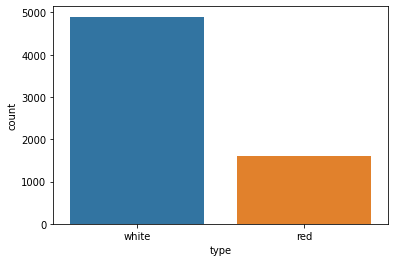

Liczba wierszy z wartością 'white':  4898
Liczba wierszy z wartością 'red':  1599


In [78]:
sns.countplot(x='type', data=dataMore)
plt.show()
liczba_wierszy = dataMore[dataMore['type'] == 'white'].shape[0]
print("Liczba wierszy z wartością 'white': ", liczba_wierszy)
liczba_wierszy = dataMore[dataMore['type'] == 'red'].shape[0]
print("Liczba wierszy z wartością 'red': ", liczba_wierszy)

Usuńmy wartości odstające i sprawdźmy jeszcze raz:

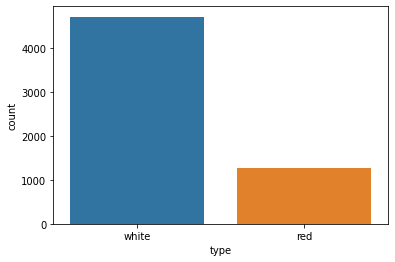

Liczba wierszy z wartością 'white':  4712
Liczba wierszy z wartością 'red' 1277


In [79]:
z_scores = np.abs(stats.zscore(dataMore.drop(columns=['type'])))
threshold = 3  # Ustalamy próg dla wartości odstających
dataMore = dataMore[(z_scores < threshold).all(axis=1)]

sns.countplot(x='type', data=dataMore)
plt.show()
liczba_wierszy = dataMore[dataMore['type'] == 'white'].shape[0]
print("Liczba wierszy z wartością 'white': ", liczba_wierszy)
liczba_wierszy = dataMore[dataMore['type'] == 'red'].shape[0]
print("Liczba wierszy z wartością 'red'", liczba_wierszy)


Jest dysproporcja w danych, natomiast mieści się w łagodnym niezrównoważeniu, więc nie będziemy wyrównywać liczebności próbek.

Standaryzacja i PCA:

In [80]:
dataMore = dataMore.replace({'type': {'white': 0, 'red': 1}})

X_more = dataMore.drop('type', axis=1)
y_more = dataMore['type']

scaler = StandardScaler()
X_more = scaler.fit_transform(X_more)

pca = PCA(n_components=2)
X_more = pca.fit_transform(X_more)

### Podział na zbiór treningowy i testowy.

Teraz podzielimy nasz zbiór danych na zbiór treningowy i testowy w proporcji 80/20. Około 1300/1200 wierszy powinno nam wystarczyć do dobrego przetestowania modeli. 

In [81]:
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(X_less, y_less, test_size=0.2, random_state=269402)
X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(X_more, y_more, test_size=0.2, random_state=269402)

# Klasyfikacja

W tej sekcji przetestujemy różne algorytmy klasyfikacji na obu wersjach naszego zbioru danych. Dla każdego klasyfikatora obliczymy dokładność (accuracy) oraz stworzymy macierz błędów.

### Drzewo decyzyjne

Wersja mniej przetworzona

In [82]:
# Drzewo decyzyjne z przyciętymi gałęziami
dt_less_pruned = DecisionTreeClassifier(max_depth=3, random_state=269402)
dt_less_pruned.fit(X_train_less, y_train_less)
classifiers.append(dt_less_pruned)
names.append(f"Drzewo decyzyjne z przyciętymi gałęziami (less)")


# Drzewo decyzyjne większe (bez ograniczenia głębokości)
dt_less_large = DecisionTreeClassifier(random_state=269402)
dt_less_large.fit(X_train_less, y_train_less)
classifiers.append(dt_less_large)
names.append(f"Drzewo decyzyjne bez ograniczeń (less)");

Wersja bardziej przetworzona

In [83]:
# Drzewo decyzyjne z przyciętymi gałęziami
dt_more_pruned = DecisionTreeClassifier(max_depth=3, random_state=269402)
dt_more_pruned.fit(X_train_more, y_train_more)
classifiers.append(dt_more_pruned)
names.append(f"Drzewo decyzyjne z przyciętymi gałęziami (more)")

# Drzewo decyzyjne większe (bez ograniczenia głębokości)
dt_more_large = DecisionTreeClassifier(random_state=269402)
dt_more_large.fit(X_train_more, y_train_more)
classifiers.append(dt_more_large)
names.append(f"Drzewo decyzyjne bez ograniczeń (more)");

### Naiwny Bayes

Wersja mniej przetworzona

In [84]:
nb_less = GaussianNB()
nb_less.fit(X_train_less, y_train_less)
classifiers.append(nb_less)
names.append(f"Naiwny Bayes (less)");

Wersja bardziej przetworzona

In [85]:
nb_more = GaussianNB()
nb_more.fit(X_train_more, y_train_more)
classifiers.append(nb_more)
names.append(f"Naiwny Bayes (more)");

### K-Najbliższych Sąsiadów

In [86]:
k_values = [1, 3, 5, 7, 9]

Wersja mniej przetworzona

In [87]:
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_less, y_train_less)
    classifiers.append(knn_clf)
    names.append(f'KNN k={k} (less)')

Wersja bardziej przetworzona

In [88]:
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_more, y_train_more)
    classifiers.append(knn_clf)
    names.append(f'KNN k={k} (more)')

### Sieć neuronowa

In [89]:
# Różne topologie i konfiguracje uczenia
hidden_layer_sizes = [(50,), (100,), (150,)]
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1]

Wersja mniej przetworzona

In [90]:
for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=500, random_state=269402)
                mlp.fit(X_train_less, y_train_less)
                classifiers.append(mlp)
                names.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (less)")


Wersja bardziej przetworzona

In [91]:
for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=15000, random_state=269402)
                mlp.fit(X_train_more, y_train_more)
                classifiers.append(mlp)
                names.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (more)")


# Podsumowanie

W tej części porównamy wyniki uzyskane dla różnych klasyfikatorów na obu wersjach danych. Określimy, który z klasyfikatorów osiągnął najlepsze wyniki.

In [104]:
len(classifiers)

304

Stworzyliśmy wiele klasyfikatorów, więc zobaczmy, które z nich miały największą dokładność.

In [105]:
results = {}
for clf, name in zip(classifiers, names):
    if "less" in name:
        y_pred = clf.predict(X_test_less)
        accuracy = accuracy_score(y_test_less, y_pred)
    elif "more" in name:
        y_pred = clf.predict(X_test_more)
        accuracy = accuracy_score(y_test_more, y_pred)
    results[name] = accuracy;

Przeanalizujmy osobno dane bardziej przetworzone.

In [106]:
resultsSorted = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for key, value in resultsSorted.items():
    if "more" in key:
        print(f"{key}: {value:.4f}")

MLP ((50,), relu, lbfgs, 0.1) (more): 0.9833
KNN k=7 (more): 0.9816
MLP ((100,), logistic, lbfgs, 0.1) (more): 0.9816
MLP ((150,), identity, adam, 0.0001) (more): 0.9816
MLP ((150,), identity, adam, 0.001) (more): 0.9816
MLP ((150,), identity, adam, 0.01) (more): 0.9816
MLP ((150,), identity, adam, 0.1) (more): 0.9816
MLP ((150,), logistic, lbfgs, 0.001) (more): 0.9816
MLP ((150,), relu, adam, 0.0001) (more): 0.9816
MLP ((150,), relu, adam, 0.001) (more): 0.9816
MLP ((150,), relu, adam, 0.01) (more): 0.9816
KNN k=9 (more): 0.9808
MLP ((50,), identity, lbfgs, 0.0001) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.001) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.01) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.1) (more): 0.9808
MLP ((50,), identity, adam, 0.1) (more): 0.9808
MLP ((50,), logistic, lbfgs, 0.001) (more): 0.9808
MLP ((50,), logistic, adam, 0.1) (more): 0.9808
MLP ((50,), tanh, sgd, 0.0001) (more): 0.9808
MLP ((50,), tanh, sgd, 0.001) (more): 0.9808
MLP ((50,), tanh, sgd, 0

Sieć neuronowa bardzo dobrze poradziła sobie z problemem. Możemy zauważyć, że dobór parametrów nie odgrywał tutaj większej roli, wszystkie kombinacje uzyskały zadowalające wyniki. KNN z siedmioma i dziewięcioma sąsiadami, również z bardzo dobrymi wynikami.

In [107]:
for key, value in resultsSorted.items():
    if "more" in key:
        if "Drzewo" in key or "Bayes" in key:
            print(f"{key}: {value:.4f}")

Naiwny Bayes (more): 0.9783
Drzewo decyzyjne z przyciętymi gałęziami (more): 0.9766
Drzewo decyzyjne bez ograniczeń (more): 0.9725


Naiwny Bayes i drzewa decyzyjne również uzyskały dobre wyniki. Co ciekawe, ograniczenie drzewa lekko poprawiło jego wydajność.

</br>

Zobaczmy teraz dane mniej przetworzone.

In [108]:
for key, value in resultsSorted.items():
    if "less" in key:
        print(f"{key}: {value:.4f}")

MLP ((50,), tanh, lbfgs, 0.1) (less): 0.9946
MLP ((50,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.0001) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.001) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.01) (less): 0.9938
MLP ((100,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((100,), tanh, lbfgs, 0.1) (less): 0.9938
MLP ((150,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.0001) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.001) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.01) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.1) (less): 0.9938
MLP ((150,), tanh, adam, 0.0001) (less): 0.9938
MLP ((150,), tanh, adam, 0.001) (less): 0.9938
MLP ((150,), tanh, adam, 0.01) (less): 0.9938
MLP ((50,), tanh, adam, 0.0001) (less): 0.9930
MLP ((50,), tanh, adam, 0.001) (less): 0.9930
MLP ((50,), tanh, adam, 0.01) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.0001) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.01) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.1) (less): 0.9930
MLP ((50,),

Tutaj sytuacja jest zgłona inna. Wyniki są lepsze bez z-score i PCA. Sama standaryzacja danych w tym przypadku zupełnie wystarczyła. Dodatkowo najlepsze wyniki uzyskały sieci neuronowe, chociaż KNN, Drzewa i Bayes mają accuracy ponad 95%. 

In [109]:
for key, value in resultsSorted.items():
    if "less" in key:
        if "KNN" in key:
            print(f"{key}: {value:.4f}")

KNN k=1 (less): 0.9923
KNN k=3 (less): 0.9907
KNN k=5 (less): 0.9907
KNN k=7 (less): 0.9907
KNN k=9 (less): 0.9884


### Macierze błędów i wykresy

Zwizualizujmy kilka modeli.

In [114]:
keysToShow = ["MLP ((50,), tanh, lbfgs, 0.1) (less)", "MLP ((50,), logistic, lbfgs, 0.1) (less)", "KNN k=1 (less)",
              "KNN k=3 (less)", "Drzewo decyzyjne bez ograniczeń (less)", "Naiwny Bayes (less)"]
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
someOfBestResults = dictfilt(results, keysToShow)

Drzewo decyzyjne bez ograniczeń (less) - Accuracy: 0.9814


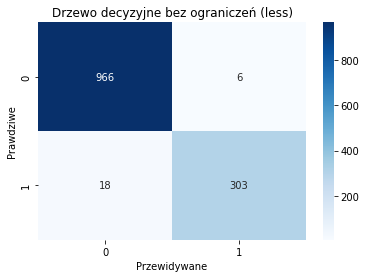

Naiwny Bayes (less) - Accuracy: 0.9760


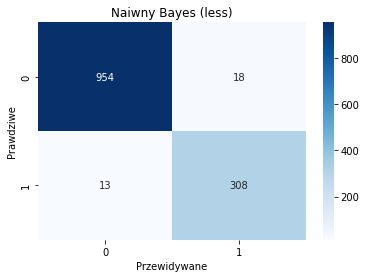

KNN k=1 (less) - Accuracy: 0.9923


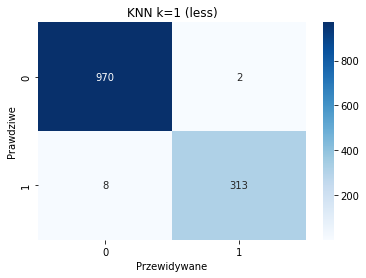

KNN k=3 (less) - Accuracy: 0.9907


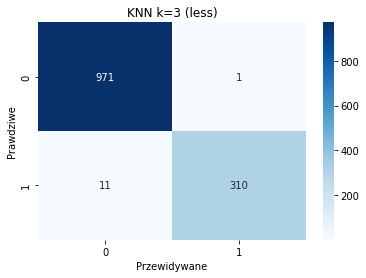

MLP ((50,), logistic, lbfgs, 0.1) (less) - Accuracy: 0.9938


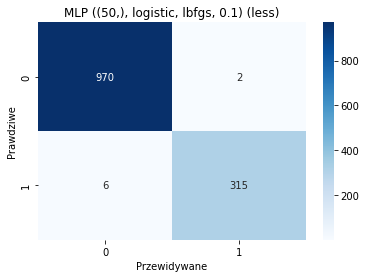

MLP ((50,), tanh, lbfgs, 0.1) (less) - Accuracy: 0.9946


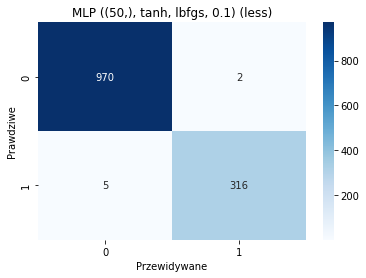

In [115]:
def plot_confusion_matrix_custom(cm, title='Confusion matrix'):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.ylabel('Prawdziwe')
    plt.xlabel('Przewidywane')
    plt.title(title)
    plt.show()

for clf, name in zip(classifiers, names):
    for resultName in someOfBestResults.keys():
        if resultName == name:
            y_pred = clf.predict(X_test_less)
            accuracy = accuracy_score(y_test_less, y_pred)
            print(f"{name} - Accuracy: {accuracy:.4f}")
            
            # Wizualizacja macierzy błędów
            matrix = confusion_matrix(y_test_less, y_pred)
            plot_confusion_matrix_custom(matrix, title=name)

Ograniczona pamięć sprzętu, na którym są wykonywane obliczenia nie pozwoliła nam na przetrzymywanie krzywych uczenia się. </br>
Źródło: https://github.com/amueller/introduction_to_ml_with_python/issues/67 </br>
Krzywa uczenia się jeszcze pojawi się w tej pracy później.

# Inne klasyfikowanie

Zobaczmy dodatkowo jak modele będą sobie radzić z klasyfikacją kolumny dotyczącej jakości wina.

In [59]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [60]:
dataMore = data.copy()
dataMore.fillna(dataMore.median(numeric_only=True), inplace=True)
dataMore = dataMore.replace({'type': {'white': 0, 'red': 1}})

X_more = dataMore.drop('quality', axis=1)
y_more = dataMore['quality']

scaler = StandardScaler()
X_more = scaler.fit_transform(X_more)

X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(X_more, y_more, test_size=0.2, random_state=269402)

classifiersQuality = []
namesQuality = []

### Drzewo decyzyjne

In [61]:
dt_more_large = DecisionTreeClassifier(random_state=269402)
dt_more_large.fit(X_train_more, y_train_more)
classifiersQuality.append(dt_more_large)
namesQuality.append(f"Drzewo decyzyjne bez ograniczeń (more)");

### Naiwny Bayes

In [62]:
nb_more = GaussianNB()
nb_more.fit(X_train_more, y_train_more)
classifiersQuality.append(nb_more)
namesQuality.append(f"Naiwny Bayes (more)");

### K-Najbliższych Sąsiadów

In [63]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_more, y_train_more)
    classifiersQuality.append(knn_clf)
    namesQuality.append(f'KNN k={k} (more)')

### Sieć neuronowa

In [64]:
hidden_layer_sizes = [(100,), (150,)]
activations = ['tanh', 'relu']
solvers = ['sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1]

for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=15000, random_state=269402)
                mlp.fit(X_train_more, y_train_more)
                classifiersQuality.append(mlp)
                namesQuality.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (more)")

# Wyniki

In [65]:
resultsQuality = {}
for clf, name in zip(classifiersQuality, namesQuality):
    y_pred = clf.predict(X_test_more)
    accuracy = accuracy_score(y_test_more, y_pred)
    resultsQuality[name] = accuracy;

In [66]:
resultsSortedQuality = dict(sorted(resultsQuality.items(), key=lambda item: item[1], reverse=True))
for key, value in resultsSortedQuality.items():
    print(f"{key}: {value:.4f}")

KNN k=1 (more): 0.6385
Drzewo decyzyjne bez ograniczeń (more): 0.6108
MLP ((150,), relu, adam, 0.0001) (more): 0.5869
MLP ((100,), relu, sgd, 0.1) (more): 0.5846
MLP ((150,), tanh, adam, 0.01) (more): 0.5815
MLP ((150,), relu, sgd, 0.01) (more): 0.5800
MLP ((100,), relu, sgd, 0.001) (more): 0.5792
MLP ((100,), relu, sgd, 0.01) (more): 0.5777
MLP ((150,), tanh, adam, 0.0001) (more): 0.5777
MLP ((100,), relu, sgd, 0.0001) (more): 0.5769
MLP ((100,), relu, adam, 0.01) (more): 0.5762
MLP ((150,), relu, sgd, 0.1) (more): 0.5762
MLP ((150,), relu, adam, 0.01) (more): 0.5762
MLP ((150,), tanh, sgd, 0.01) (more): 0.5754
MLP ((150,), tanh, adam, 0.001) (more): 0.5746
MLP ((150,), relu, adam, 0.001) (more): 0.5738
MLP ((150,), relu, sgd, 0.001) (more): 0.5700
MLP ((150,), tanh, sgd, 0.0001) (more): 0.5677
MLP ((150,), tanh, sgd, 0.001) (more): 0.5669
MLP ((150,), tanh, sgd, 0.1) (more): 0.5669
MLP ((150,), relu, adam, 0.1) (more): 0.5654
MLP ((100,), tanh, sgd, 0.01) (more): 0.5638
MLP ((100,), 

Podczas klasyfikacji jakości wina nasze modele poradziły sobie znacznie gorzej niż wcześniej. Przoduje metoda KNN k=1, jednak nie można byłoby jej w pełni zaufać przy dokładności rzędu 64%.

Drzewo decyzyjne bez ograniczeń (more) - Accuracy: 0.6108


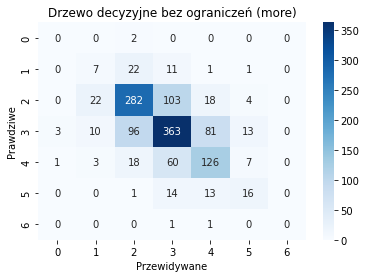

Naiwny Bayes (more) - Accuracy: 0.4069


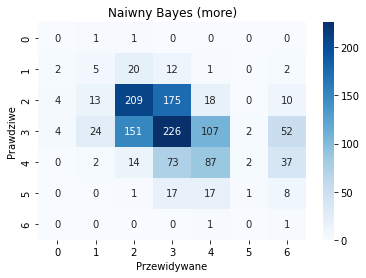

KNN k=1 (more) - Accuracy: 0.6385


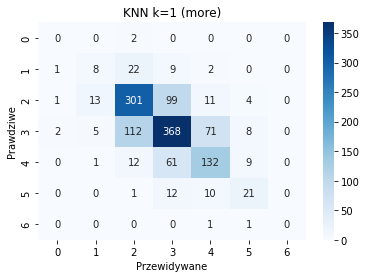

KNN k=9 (more) - Accuracy: 0.5546


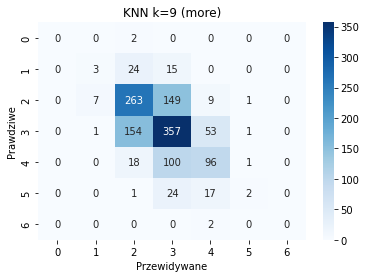

MLP ((100,), relu, sgd, 0.01) (more) - Accuracy: 0.5777


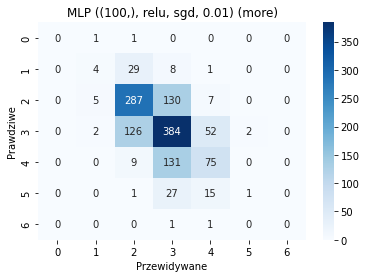

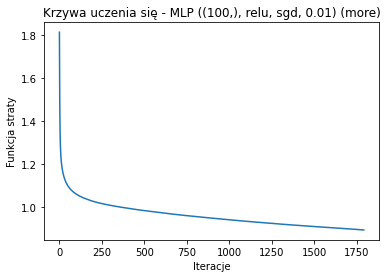

MLP ((100,), relu, sgd, 0.1) (more) - Accuracy: 0.5846


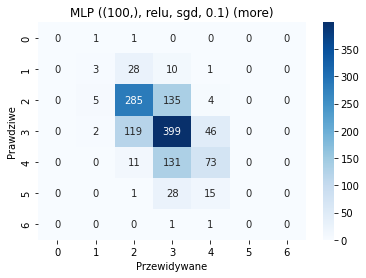

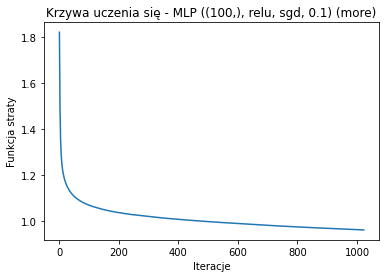

In [67]:
keysToShow = ["KNN k=1 (more)", "KNN k=9 (more)", "MLP ((100,), relu, sgd, 0.01) (more)",
              "MLP ((100,), relu, sgd, 0.1) (more)", "Naiwny Bayes (more)", "Drzewo decyzyjne bez ograniczeń (more)"]
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
someOfBestResultsQuality = dictfilt(results, keysToShow)

for clf, name in zip(classifiersQuality, namesQuality):
    for resultName in someOfBestResultsQuality.keys():
        if resultName == name:
            y_pred = clf.predict(X_test_more)
            accuracy = accuracy_score(y_test_more, y_pred)
            print(f"{name} - Accuracy: {accuracy:.4f}")
            
            # Wizualizacja macierzy błędów
            matrix = confusion_matrix(y_test_more, y_pred)
            plot_confusion_matrix_custom(matrix, title=name)
            
            # Krzywa uczenia się dla sieci neuronowych
            if isinstance(clf, MLPClassifier):
                plt.plot(clf.loss_curve_)
                plt.title(f"Krzywa uczenia się - {name}")
                plt.xlabel("Iteracje")
                plt.ylabel("Funkcja straty")
                plt.show()

#### Dziękuję za poświęcony czas na przeczytanie tej pracy. </br>
#### Sprawozdanie sporządzone przez Kamila Schlagowskiego, MMAD III, 269402

# Bibliografia

Materiały wykorzystane podczas pisania pracy:
- wykłady z inteligencji obliczeniowej

- https://www.kaggle.com/datasets/rajyellow46/wine-quality

- https://github.com/amueller/introduction_to_ml_with_python/issues/67

- https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam

- https://jakbadacdane.pl/jak-wyhodowac-drzewo-decyzyjne/

- https://scikit-learn.org/stable/modules/preprocessing.html

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

- https://realpython.com/sort-python-dictionary/
- https://realpython.com/python-sort/

- https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error
- https://stackoverflow.com/questions/49871101/how-to-select-range-of-rows-in-pandas#49871201
- https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell
- https://stackoverflow.com/questions/2590503/how-to-find-whether-a-string-is-contained-in-another-string#2590519
- https://stackoverflow.com/questions/2590503/how-to-find-whether-a-string-is-contained-in-another-string#2590519
- https://stackoverflow.com/questions/3420122/filter-dict-to-contain-only-certain-keys

- pomagał mi również Github Copilot:
</br> https://github.com/features/copilot
- oraz Chat GPT 4.0:
</br> https://chat.openai.com/?model=gpt-4